In [9]:
# Install Tensorflow
!pip install -q tensorflow==2.0.0-beta1

ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [10]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

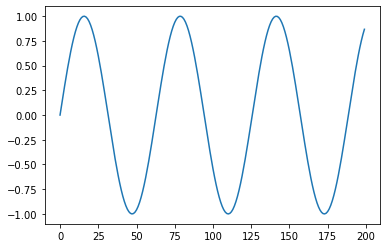

In [27]:
# make the original data
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1

# plot it
plt.plot(series)
plt.show()

In [28]:
### build the dataset
# let's see if we can use T past values to predict the next value

T = 10
D = 1
X = []
Y = []

for t in range(len(series) -  T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [35]:
### try autoregressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# trian the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data = (X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 5ms/sample - loss: 2.0612 - val_loss: 0.0572
Epoch 2/80
95/95 [==============================] - 0s 177us/sample - loss: 0.0517 - val_loss: 0.0375
Epoch 3/80
95/95 [==============================] - 0s 194us/sample - loss: 0.0279 - val_loss: 0.0336
Epoch 4/80
95/95 [==============================] - 0s 166us/sample - loss: 0.0411 - val_loss: 0.0395
Epoch 5/80
95/95 [==============================] - 0s 185us/sample - loss: 0.0430 - val_loss: 0.0340
Epoch 6/80
95/95 [==============================] - 0s 162us/sample - loss: 0.0324 - val_loss: 0.0571
Epoch 7/80
95/95 [==============================] - 0s 167us/sample - loss: 0.0359 - val_loss: 0.0285
Epoch 8/80
95/95 [==============================] - 0s 191us/sample - loss: 0.0248 - val_loss: 0.0150
Epoch 9/80
95/95 [==============================] - 0s 172us/sample - loss: 0.0161 - val_loss: 0.0141
Epoch 10/80
95/95 [=====================

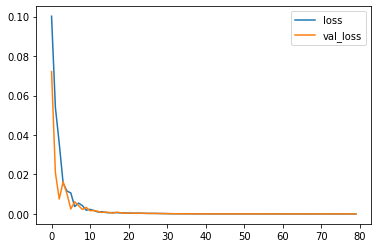

In [30]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

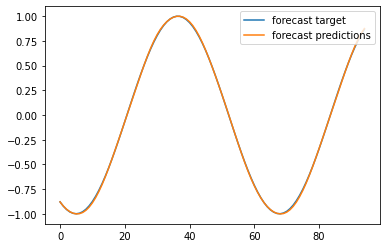

In [32]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

In [0]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input 
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input 
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

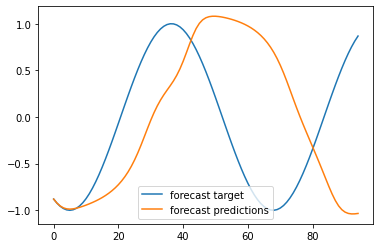

In [34]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()